In [5]:
#import dependencies
import tweepy
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

#Establish CSV path for relevant files
# csv_path1 = "Player Tweets/Aldon Smith_Trans 1.csv"
csv_path2 = "Player Tweets/Aldon Smith_Trans 2.csv"
csv_path3 = "Player Tweets/Aldon Smith_Trans 3.csv"


#Establish pd dataframe for each file
#aldonsmith1 = pd.read_csv(csv_path1, sep=";")
aldonsmith2 = pd.read_csv(csv_path2, sep=";")
aldonsmith3 = pd.read_csv(csv_path3, sep=";")

#concatenate data frames *kennybritt4* not working
aldonsmith_master = pd.concat([aldonsmith2, aldonsmith3])
aldonsmith_master

,username,date,retweets,favorites,text,geo,mentions,hashtags,id,permalink
0,NaN,2015-08-13 18:55,1,2,"10-15 years from now, Josh Gordon, Justin Blac...",NaN,NaN,NaN,631977399748591616,https://twitter.com/spida2Ybanana/status/63197...
1,NaN,2015-08-13 18:54,0,0,"Tom Brady is like a fine wine, they've both be...",NaN,NaN,#,631977096135471105,https://twitter.com/SeanFiveOne/status/6319770...
2,NaN,2015-08-13 18:49,0,3,One can say bad things about # AldonSmith. But...,NaN,NaN,#,631976017565913089,https://twitter.com/FootballNFLS/status/631976...
3,NaN,2015-08-13 18:43,0,0,@ jeffpaul http://bit.ly/ffbl4 Colin Kaepernic...,NaN,@,NaN,631974502591696897,https://twitter.com/FanDog123/status/631974502...
4,NaN,2015-08-13 18:30,0,1,@ JasonMinnix you didn't mention Aldon smith o...,NaN,@,#,631971164097613824,https://twitter.com/Pr1cetag/status/6319711640...
5,NaN,2015-08-13 18:25,0,0,Fan Buzz: Colin Kaepernick slams media followi...,NaN,NaN,NaN,631969825716240385,https://twitter.com/JOBOOZOSO/status/631969825...
6,NaN,2015-08-13 18:23,0,0,Colin Kaepernick slams media following misrepo...,NaN,NaN,NaN,631969375533182976,https://twitter.com/FanBuzz/status/63196937553...
7,NaN,2015-08-13 18:20,0,2,Colin Kaepernick slams reports that he had fig...,NaN,NaN,NaN,631968495375249409,https://twitter.com/FresnoBee/status/631968495...
8,NaN,2015-08-13 18:15,0,0,Still depressed about Aldon smith man,NaN,NaN,NaN,631967412405989376,https://twitter.com/stvcdo/status/631967412405...
9,NaN,2015-08-13 18:15,0,1,# Atlanta # Falcons So you're saying there's a...,NaN,@,# #,631967250300432384,https://twitter.com/perfectsliders/status/6319...


In [6]:
#fillna's with text to fix error
aldonsmith_master["text"].fillna("text", inplace=True)
aldonsmith_master.head()


,username,date,retweets,favorites,text,geo,mentions,hashtags,id,permalink
0,NaN,2015-08-13 18:55,1,2,"10-15 years from now, Josh Gordon, Justin Blac...",NaN,NaN,NaN,631977399748591616,https://twitter.com/spida2Ybanana/status/63197...
1,NaN,2015-08-13 18:54,0,0,"Tom Brady is like a fine wine, they've both be...",NaN,NaN,#,631977096135471105,https://twitter.com/SeanFiveOne/status/6319770...
2,NaN,2015-08-13 18:49,0,3,One can say bad things about # AldonSmith. But...,NaN,NaN,#,631976017565913089,https://twitter.com/FootballNFLS/status/631976...
3,NaN,2015-08-13 18:43,0,0,@ jeffpaul http://bit.ly/ffbl4 Colin Kaepernic...,NaN,@,NaN,631974502591696897,https://twitter.com/FanDog123/status/631974502...
4,NaN,2015-08-13 18:30,0,1,@ JasonMinnix you didn't mention Aldon smith o...,NaN,@,#,631971164097613824,https://twitter.com/Pr1cetag/status/6319711640...


In [7]:
#create list of sentiment scores associated with tweets about relevant player

aldonsmith_sent = []

tweets = aldonsmith_master["text"]

for index,tweet in aldonsmith_master.iterrows():
    results = analyzer.polarity_scores(tweet["text"])
    compound = results["compound"]
    pos = results["pos"]
    neu = results["neu"]
    neg = results["neg"]
        
    # Add sentiments for each tweet into an array
    aldonsmith_sent.append({"date": tweet["date"], 
                        "Compound": compound,
                        "Positive": pos,
                        "Negative": neu,
                        "Neutral": neg})
aldonsmith_sent



[{'Compound': 0.0,
  'Negative': 1.0,
  'Neutral': 0.0,
  'Positive': 0.0,
  'date': '2015-08-13 18:55'},
 {'Compound': 0.4404,
  'Negative': 0.678,
  'Neutral': 0.079,
  'Positive': 0.243,
  'date': '2015-08-13 18:54'},
 {'Compound': -0.8316,
  'Negative': 0.514,
  'Neutral': 0.369,
  'Positive': 0.117,
  'date': '2015-08-13 18:49'},
 {'Compound': -0.34,
  'Negative': 0.854,
  'Neutral': 0.146,
  'Positive': 0.0,
  'date': '2015-08-13 18:43'},
 {'Compound': 0.1007,
  'Negative': 0.932,
  'Neutral': 0.0,
  'Positive': 0.068,
  'date': '2015-08-13 18:30'},
 {'Compound': -0.0516,
  'Negative': 0.696,
  'Neutral': 0.158,
  'Positive': 0.146,
  'date': '2015-08-13 18:25'},
 {'Compound': -0.3612,
  'Negative': 0.815,
  'Neutral': 0.185,
  'Positive': 0.0,
  'date': '2015-08-13 18:23'},
 {'Compound': -0.3818,
  'Negative': 0.822,
  'Neutral': 0.178,
  'Positive': 0.0,
  'date': '2015-08-13 18:20'},
 {'Compound': -0.5106,
  'Negative': 0.602,
  'Neutral': 0.398,
  'Positive': 0.0,
  'date': '

In [8]:
# Convert player sentiments to DataFrame
AS_pd = pd.DataFrame.from_dict(aldonsmith_sent)
AS_pd.head()

,Compound,Negative,Neutral,Positive,date
0,0.0000,1.000,0.000,0.000,2015-08-13 18:55
1,0.4404,0.678,0.079,0.243,2015-08-13 18:54
2,-0.8316,0.514,0.369,0.117,2015-08-13 18:49
3,-0.3400,0.854,0.146,0.000,2015-08-13 18:43
4,0.1007,0.932,0.000,0.068,2015-08-13 18:30


In [10]:
# merge sentiment data frame and master player tweet file

merged = pd.merge(aldonsmith_master, AS_pd, on="date", how="outer")
merged.head()

,username,date,retweets,favorites,text,geo,mentions,hashtags,id,permalink,Compound,Negative,Neutral,Positive
0,NaN,2015-08-13 18:55,1,2,"10-15 years from now, Josh Gordon, Justin Blac...",NaN,NaN,NaN,631977399748591616,https://twitter.com/spida2Ybanana/status/63197...,0.0000,1.000,0.000,0.000
1,NaN,2015-08-13 18:54,0,0,"Tom Brady is like a fine wine, they've both be...",NaN,NaN,#,631977096135471105,https://twitter.com/SeanFiveOne/status/6319770...,0.4404,0.678,0.079,0.243
2,NaN,2015-08-13 18:49,0,3,One can say bad things about # AldonSmith. But...,NaN,NaN,#,631976017565913089,https://twitter.com/FootballNFLS/status/631976...,-0.8316,0.514,0.369,0.117
3,NaN,2015-08-13 18:43,0,0,@ jeffpaul http://bit.ly/ffbl4 Colin Kaepernic...,NaN,@,NaN,631974502591696897,https://twitter.com/FanDog123/status/631974502...,-0.3400,0.854,0.146,0.000
4,NaN,2015-08-13 18:30,0,1,@ JasonMinnix you didn't mention Aldon smith o...,NaN,@,#,631971164097613824,https://twitter.com/Pr1cetag/status/6319711640...,0.1007,0.932,0.000,0.068


In [11]:
# remove time from datetime to be able to groupby an individual day
pd.DatetimeIndex(merged.date).normalize()
merged['date_new'] = pd.DatetimeIndex(merged.date).normalize()
merged.head()

,username,date,retweets,favorites,text,geo,mentions,hashtags,id,permalink,Compound,Negative,Neutral,Positive,date_new
0,NaN,2015-08-13 18:55,1,2,"10-15 years from now, Josh Gordon, Justin Blac...",NaN,NaN,NaN,631977399748591616,https://twitter.com/spida2Ybanana/status/63197...,0.0000,1.000,0.000,0.000,2015-08-13
1,NaN,2015-08-13 18:54,0,0,"Tom Brady is like a fine wine, they've both be...",NaN,NaN,#,631977096135471105,https://twitter.com/SeanFiveOne/status/6319770...,0.4404,0.678,0.079,0.243,2015-08-13
2,NaN,2015-08-13 18:49,0,3,One can say bad things about # AldonSmith. But...,NaN,NaN,#,631976017565913089,https://twitter.com/FootballNFLS/status/631976...,-0.8316,0.514,0.369,0.117,2015-08-13
3,NaN,2015-08-13 18:43,0,0,@ jeffpaul http://bit.ly/ffbl4 Colin Kaepernic...,NaN,@,NaN,631974502591696897,https://twitter.com/FanDog123/status/631974502...,-0.3400,0.854,0.146,0.000,2015-08-13
4,NaN,2015-08-13 18:30,0,1,@ JasonMinnix you didn't mention Aldon smith o...,NaN,@,#,631971164097613824,https://twitter.com/Pr1cetag/status/6319711640...,0.1007,0.932,0.000,0.068,2015-08-13


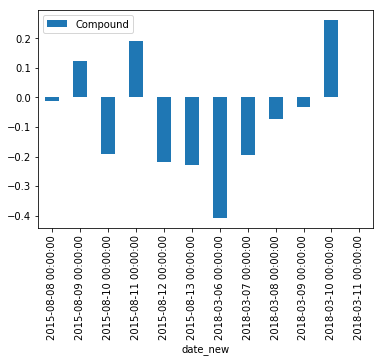

In [12]:
#plot groupby *x axis = day, y axis = compound sentiment score*
grouped = merged.groupby(['date_new'])
grouped.mean().reset_index().plot.bar("date_new", "Compound")
plt.savefig('aldonsmith.png')
plt.show()
